In [1]:
import tkinter
import tkinter.messagebox
import customtkinter
from tkinter import ttk
from PIL import Image 
from PIL import ImageTk
import warnings
warnings.filterwarnings("ignore")

In [2]:
%run "model_functions.ipynb"
%run "plot_functions.ipynb"
%run "params.ipynb"
%run "textboxes.ipynb"

In [3]:
customtkinter.set_appearance_mode("System")  # Modes: "System" (standard), "Dark", "Light"
customtkinter.set_default_color_theme("blue")  # Themes: "blue" (standard), "green", "dark-blue"

In [4]:
class App(customtkinter.CTk):

    def update_slider_value(self, index, tab_sliders, tab_labels, tab_labels_max):
        """
        Update the value of a slider and corresponding labels.

        Parameters:
        - index (int): Index of the slider.
        - tab_sliders (list): List of sliders in the current tab.
        - tab_labels (list): List of labels associated with sliders.
        - tab_labels_max (list): List of labels displaying maximum values for sliders.

        Returns:
        None
        """

        slider = tab_sliders[index]
        label = tab_labels[index]
        
        # Get the slider value and update the label
        value = slider.get()
        label.configure(text=f"Value: {value:.2f}")

        if tab_sliders == self.general_sliders:
            if index == 0:
                self.x = int(value)
            elif index == 1:
                self.P = int(value)
            elif index == 2:
                self.T = int(value)
            else:
                self.e1 = value
        elif tab_sliders == self.initialization_sliders:
            if index == 0:
                self.n = value
            else:
                self.z = value
        elif tab_sliders == self.incentives_sliders:
            if index == 0:
                self.d0 = value
            elif index == 1:
                self.a1l = value
            elif index == 2:
                self.a2l = value
            elif index == 3:
                self.a3l = value
            elif index == 4:
                self.a1h = value
            elif index == 5:
                self.a2h = value
            else:
                self.a3h = value
        elif tab_sliders == self.network_sliders: 
            if index == 0:
                self.ne_ER = value
            elif index == 1:
                self.ne_BA = int(value)
                self.network_sliders[1].configure(to=self.P - 1)
                self.network_labels_max[1].configure(text=f"Max: {self.P - 1}")
            elif index == 2:
                self.impact = value
            else:
                self.sigma == value
        elif tab_sliders == self.HSM_sliders:
            if index == 0:
                self.b1 = value
            elif index == 1:
                self.b2 = value
            elif index == 2:
                self.b3 = value
            elif index == 3:
                self.eta = value
            elif index == 4:
                self.h_upd_chance = value
            else:
                self.choice_intensity = value

    def create_slider(self, key, value, tab_sliders, tab_labels, tab_labels_max, ypad):
        """
        Create a slider with associated labels and add them to the UI.

        Parameters:
        - key (str): Label for the slider.
        - value (list): Range and initial value for the slider.
        - tab_sliders (list): List of sliders in the current tab.
        - tab_labels (list): List of labels associated with sliders.
        - tab_labels_max (list): List of labels displaying maximum values for sliders.
        - ypad (int): Y-padding for the slider.

        Returns:
        None
        """

        slider = customtkinter.CTkSlider(
            self.slider_progressbar_frame,
            from_=value[0],
            to=value[1],
            number_of_steps=100,
            width=450
        )
        slider.grid(row=self.count, column=0, padx=(20, 10), pady=(ypad, ypad), sticky="ew")
        slider.bind("<B1-Motion>", lambda event, index=self.count: self.update_slider_value(index, tab_sliders, tab_labels, tab_labels_max))
        tab_sliders.append(slider)
        slider.set(value[2])

        name_label = ttk.Label(
            self.slider_progressbar_frame,
            text=f"{key}",
            font=customtkinter.CTkFont(weight="bold")
        )
        name_label.grid(row=self.count, column=1, padx=(0, 0), pady=(0, 0), sticky="ew")
        
        label = ttk.Label(
            self.slider_progressbar_frame,
            text=f"Value: {value[2]:.2f}"
        )
        label.grid(row=self.count, column=2, padx=(5, 5), pady=(0, 0), sticky="ew")
        
        min_label = ttk.Label(
            self.slider_progressbar_frame,
            text=f"Min: {value[0]}"
        )
        min_label.grid(row=self.count, column=3, padx=(5, 5), pady=(0, 0), sticky="ew")
        
        max_label = ttk.Label(
            self.slider_progressbar_frame,
            text=f"Max: {value[1]}"
        )
        max_label.grid(row=self.count, column=4, padx=(5, 5), pady=(0, 0), sticky="ew")
        
        tab_labels.append(label)
        tab_labels_max.append(max_label)

        self.count += 1

    def __init__(self, x, n, z, P, ne, T, e1, d0, a1l, a1h, a2l, a2h, a3l, a3h, impact, sigma, b1, b2, b3, h_upd_chance, eta, choice_intensity):
        """
        Initialize the App class with model parameters and UI configuration.

        Returns:
        None
        """

        super().__init__()

        # configure window
        self.title("Agent-based CPR model")
        self.geometry(f"{1250}x{754}") # self.geometry(f"{1100}x{580}")

        # configure grid layout (4x4)
        self.grid_columnconfigure(1, weight=1)
        self.grid_columnconfigure((2, 3), weight=0)
        self.grid_rowconfigure((0, 1, 2), weight=1)

        # model variables
        self.x = x
        self.n = n
        self.z = z
        self.P = P
        self.ne_ER = 1.0
        self.ne_BA = ne
        self.T = T
        self.e1 = e1
        self.d0 = d0
        self.a1l = a1l
        self.a2l = a2l
        self.a3l = a3l
        self.a1h = a1h
        self.a2h = a2h
        self.a3h = a3h
        self.impact = impact
        self.sigma = sigma
        self.b1 = b1
        self.b2 = b2
        self.b3 = b3
        self.h_upd_chance = h_upd_chance
        self.eta = eta
        self.choice_intensity = choice_intensity

        self.outputs = np.array([1,1,1])
        self.plot_title = ''
        self.relevant_network = 1

        #############################################################################
        # create sidebar frame with widgets
        #############################################################################
        self.sidebar_frame = customtkinter.CTkFrame(self, width=140, corner_radius=0)
        self.sidebar_frame.grid(row=0, column=0, rowspan=4, sticky="nsew")
        self.sidebar_frame.grid_rowconfigure(4, weight=1)
        self.logo_label = customtkinter.CTkLabel(self.sidebar_frame, text="Interface", font=customtkinter.CTkFont(size=20, weight="bold"))
        self.logo_label.grid(row=1, column=0, padx=20, pady=(20, 10))

        # create main entry and button
        self.entry = customtkinter.CTkEntry(self, placeholder_text="Plot title (don't forget to press enter!)")
        self.entry.bind("<Return>", lambda event: self.change_plot_title(self.entry.get()))
        self.entry.grid(row=3, column=1, columnspan=2, padx=(20, 0), pady=(20, 20), sticky="nsew")

        self.main_button_1 = customtkinter.CTkButton(master=self, fg_color="transparent", border_width=2, text_color=("gray10", "#DCE4EE"), 
                                             command=lambda: self.run_model_event(), 
                                             text="Run model")
        self.main_button_1.grid(row=3, column=3, columnspan=20, padx=(20, 20), pady=(20, 20), sticky="nsew")

        #############################################################################
        # create textbox left
        #############################################################################
        self.textbox_left = customtkinter.CTkTextbox(self, wrap="word")
        self.textbox_left.grid(row=0, column=0, padx=(5, 5), pady=(65, 7), sticky="nsew", rowspan = 4)
        
        #############################################################################
        # create tabview top
        #############################################################################
        self.tabview_top = customtkinter.CTkTabview(self, width=200)
        self.tabview_top.grid(row=0, column=1, columnspan=1, padx=(20, 0), pady=(20, 0), sticky="nsew")
        self.tabview_top.add("Interface Explanation")
        self.tabview_top.add("Plot 1")
        self.tabview_top.add("Plot 2")
        self.tabview_top.add("Plot 3")

                #############################################################################
                # Interface explanation
        self.textbox = customtkinter.CTkTextbox(self.tabview_top.tab("Interface Explanation"), wrap="word")
        self.textbox.grid(row=0, column=1, columnspan=10, sticky="nsew") 
        self.tabview_top.tab("Interface Explanation").grid_columnconfigure(1, weight=1)

                #############################################################################
                # Plot 1
        my_image1 = customtkinter.CTkImage(light_image=Image.open('gui_plots/default/resource_state_default.png'),
                                           dark_image=Image.open('gui_plots/default/resource_state_default.png')
                                           , size=(544, 255))
        my_label1 = customtkinter.CTkLabel(self.tabview_top.tab("Plot 1"), text="", image=my_image1)
        my_label1.pack(pady=10)
        self.tabview_top.tab("Plot 1").grid_columnconfigure(1, weight=1)

                #############################################################################
                # Plot 2
        my_image2 = customtkinter.CTkImage(light_image=Image.open('gui_plots/default/payoff_difference_default.png'),
                                           dark_image=Image.open('gui_plots/default/payoff_difference_default.png')
                                           , size=(544, 255)) 
        my_label2 = customtkinter.CTkLabel(self.tabview_top.tab("Plot 2"), text="", image=my_image2)
        my_label2.pack(pady=10)
        self.tabview_top.tab("Plot 2").grid_columnconfigure(1, weight=1)
        
                #############################################################################
                # Plot 3
        my_image3 = customtkinter.CTkImage(light_image=Image.open('gui_plots/default/heuristics_default.png'),
                                           dark_image=Image.open('gui_plots/default/heuristics_default.png')
                                           , size=(544, 255)) 
        my_label3 = customtkinter.CTkLabel(self.tabview_top.tab("Plot 3"), text="", image=my_image3)
        my_label3.pack(pady=10)
        self.tabview_top.tab("Plot 3").grid_columnconfigure(1, weight=1)
        
        #############################################################################
        # create scrollable frame 
        #############################################################################
        self.scrollable_frame = customtkinter.CTkScrollableFrame(self, label_text="Outputs")
        self.scrollable_frame.grid(row=0, column=3, columnspan=20, padx=(20, 20), pady=(20, 0), sticky="nsew") # 2
        self.scrollable_frame.grid_columnconfigure(0, weight=1)
        self.scrollable_frame_switches = []
        for i,x in enumerate(['Resource', 'Payoffs', 'Heuristics']):
            switch = customtkinter.CTkSwitch(master=self.scrollable_frame, text=f"{x}", command=lambda i=i: self.change_outputs(i))
            switch.grid(row=i, column=0, padx=10, pady=(0, 10), sticky='w') 
            self.scrollable_frame_switches.append(switch)

        #############################################################################
        # create tabview
        #############################################################################
        self.tabview = customtkinter.CTkTabview(self, width=250)
        self.tabview.grid(row=1, column=1, columnspan=10, padx=(20, 20), pady=(20, 0), sticky="nsew")
        self.tabview.add("General")
        self.tabview.add("Initialization")
        self.tabview.add("Incentives")
        self.tabview.add("Network")
        self.tabview.add("HSM")
            
                #############################################################################
                # General
        self.slider_progressbar_frame = customtkinter.CTkFrame(self.tabview.tab("General"), fg_color="transparent")
        self.slider_progressbar_frame.grid(row=1, column=1, padx=(20, 0), pady=(20, 0), sticky="nsew")
        self.slider_progressbar_frame.grid_columnconfigure(0, weight=1)
        self.slider_progressbar_frame.grid_rowconfigure(4, weight=1)
        
        self.general_sliders = []
        self.general_labels = []
        self.general_labels_max = []
        general_dict = {'Simulations':[1,100,5], 'Agents':[30,1000,100], 'Generations':[10,250,40], '\u03B5':[0,1,0.25]}
        self.count = 0 
        for key, value in general_dict.items():
            self.create_slider(key, value, self.general_sliders, self.general_labels, self.general_labels_max , 10)

                #############################################################################
                # Initialization
        self.slider_progressbar_frame = customtkinter.CTkFrame(self.tabview.tab("Initialization"), fg_color="transparent")
        self.slider_progressbar_frame.grid(row=1, column=1, padx=(20, 0), pady=(20, 0), sticky="nsew")
        self.slider_progressbar_frame.grid_columnconfigure(0, weight=1)
        self.slider_progressbar_frame.grid_rowconfigure(4, weight=1)
        
        self.initialization_sliders = []
        self.initialization_labels = []
        self.initialization_labels_max = []
        initialization_dict = {'Resource':[0,1,1], 'Low effort fraction':[0,1,1]}
        self.count = 0 
        for key, value in initialization_dict.items():
            self.create_slider(key, value, self.initialization_sliders, self.initialization_labels, self.initialization_labels_max, 10)

                #############################################################################
                # Incentives        
        self.slider_progressbar_frame = customtkinter.CTkFrame(self.tabview.tab("Incentives"), fg_color="transparent") # CTKFrame
        self.slider_progressbar_frame.grid(row=1, column=1, padx=(20, 0), pady=(20, 0), sticky="nsew")
        self.slider_progressbar_frame.grid_columnconfigure(0, weight=1)
        self.slider_progressbar_frame.grid_rowconfigure(4, weight=1)
        
        self.incentives_sliders = []
        self.incentives_labels = []
        self.incentives_labels_max = []
        incentives_dict = {'\u03B1':[-5,5,-0.3], '\u03B31L':[0,5,0.5], '\u03B32L':[0,5,1.5], '\u03B33L':[0,5,0], 
                        '\u03B31H':[0,5,0.75], '\u03B32H':[0,5,2.25], '\u03B33H':[0,5,0]}
        self.count = 0 
        for key, value in incentives_dict.items():
            self.create_slider(key, value, self.incentives_sliders, self.incentives_labels, self.incentives_labels_max, 4)

                #############################################################################
                # Network
        # create slider and progressbar
        self.slider_progressbar_frame = customtkinter.CTkFrame(self.tabview.tab("Network"), fg_color="transparent")
        self.slider_progressbar_frame.grid(row=4, column=1, padx=(20, 0), pady=(10, 0), sticky="nsew")
        self.slider_progressbar_frame.grid_columnconfigure(0, weight=1)
        self.slider_progressbar_frame.grid_rowconfigure(4, weight=1)
        
        self.network_sliders = []
        self.network_labels = []
        self.network_labels_max = []
        network_dict = {'Link density':[0,1,1], 'New links':[0,P-1,P//2], 'Impact':[0,10, 0], 'Sigma':[0.01,2,0.1]}
        self.count = 0 
        for key, value in network_dict.items():
            self.create_slider(key, value, self.network_sliders, self.network_labels, self.network_labels_max, 10)
        
        # create radio buttom frame
        self.radiobutton_frame = customtkinter.CTkFrame(self.tabview.tab("Network"), fg_color="transparent")
        self.radiobutton_frame.grid(row=1, column=1, padx=(20, 0), pady=(10, 10), sticky="nsew")
        self.radio_var = tkinter.IntVar(value=1)
        self.radiobutton_1 = customtkinter.CTkRadioButton(master=self.radiobutton_frame, variable=self.radio_var, value=0, 
                                                            command=lambda: self.network_radio(self.radio_var), 
                                                            text='Erdös-Rényi')
        self.radiobutton_1.grid(row=2, column=1, pady=(10, 10), padx=20, sticky="w")
        self.radiobutton_2 = customtkinter.CTkRadioButton(master=self.radiobutton_frame, variable=self.radio_var, value=1, 
                                                            command=lambda: self.network_radio(self.radio_var),  
                                                            text='Barabasi-Albert')
        self.radiobutton_2.grid(row=3, column=1, pady=(10, 0), padx=20, sticky="w")

                #############################################################################
                # HSM
        self.slider_progressbar_frame = customtkinter.CTkFrame(self.tabview.tab("HSM"), fg_color="transparent")
        self.slider_progressbar_frame.grid(row=1, column=1, padx=(20, 0), pady=(20, 0), sticky="nsew")
        self.slider_progressbar_frame.grid_columnconfigure(0, weight=1)
        self.slider_progressbar_frame.grid_rowconfigure(4, weight=1)
        
        self.HSM_sliders = []
        self.HSM_labels = []
        self.HSM_labels_max = []
        HSM_dict = {'\u03B21':[0,1,0.64], '\u03B22':[0,2,0.44], '\u03B23':[-1,0,-0.44], 
                        '\u03C1':[0,1,0.9], '\u03B7':[0,1,0.7], '\u03C6':[0,100,100]}
        self.count = 0 
        for key, value in HSM_dict.items():
            self.create_slider(key, value, self.HSM_sliders, self.HSM_labels, self.HSM_labels_max, 6)
        

        #############################################################################
        # set default values
        #############################################################################
        self.scrollable_frame_switches[0].select()
        self.scrollable_frame_switches[1].select()
        self.scrollable_frame_switches[2].select()
        self.textbox_left.insert("0.0", abstract)
        self.textbox.insert("0.0", params_explanation)
        self.network_sliders[0].configure(state="disabled")
        
    def change_outputs(self, index):
        """
        Change the state of output options.

        Parameters:
        - index (int): Index of the output option.

        Returns:
        None
        """
        self.outputs[index] = 1 - self.outputs[index]
    
    def change_plot_title(self, value):
        """
        Change the plot title.

        Parameters:
        - value (str): New plot title.

        Returns:
        None
        """
        self.plot_title = value

    def network_radio(self, x):
        """
        Update the relevant network based on the selected radio button.

        Parameters:
        - x (int): Selected radio button value.

        Returns:
        None
        """
        self.relevant_network = self.radio_var.get()
        if self.radio_var.get() == 0:
            self.network_sliders[0].configure(state="normal")
            self.network_sliders[1].configure(state="disabled")
        else:
            self.network_sliders[0].configure(state="disabled")
            self.network_sliders[1].configure(state="normal")

    def update_tab_images(self, output_indices, image_paths):
        """
        Update images in the tabview_top based on the selected output options.

        Parameters:
        - output_indices (list): List indicating selected output options.
        - image_paths (list): List of paths to updated images.

        Returns:
        None
        """
        for index in np.where(output_indices == 1)[0]:
            tab_name = f"Plot {index + 1}"
            tab = self.tabview_top.tab(tab_name)

            # Find the label widget dynamically
            label_widget = None
            for child in tab.children.values():
                if isinstance(child, customtkinter.CTkLabel):
                    label_widget = child
                    break

            if label_widget:
                # Update the image of the label widget
                image = Image.open(image_paths[index])
                resized_image = image.resize((416, 195), Image.LANCZOS) # 320, 150
                tk_image = ImageTk.PhotoImage(resized_image)
                label_widget.configure(image=tk_image)
                label_widget.image = tk_image

    def run_model_event(self):
        """
        Run the agent-based model and update the UI with the results.

        Parameters:
        None

        Returns:
        None
        """
        # Call agent-based model function
        if self.relevant_network == 0:
            relevant_ne = self.ne_ER
        else: 
            relevant_ne = self.ne_BA
        n_results, pd_results, acting_p_results, degrees_results, heuristic_results = run_model(self.x, self.n, self.z, self.P, relevant_ne, self.T, self.e1, 
                                                                                                self.d0, self.a1l, self.a1h, self.a2l, self.a2h, self.a3l, self.a3h, 
                                                                                                self.impact, self.sigma, self.b1, self.b2, self.b3, self.h_upd_chance, 
                                                                                                self.eta, self.choice_intensity)  
        
        # Show the results after running the model
        updated_image_paths = ['','','']
        if self.outputs[0] == 1:
            BREE1, BREE2 = br_longrun(self.d0, self.a1l, self.a1h, self.a2l, self.a2h, self.a3l, self.a3h, self.P)
            plot1_resource_state(n_results, BREE1, BREE2, self.x, self.T, self.P, self.plot_title)
            updated_image_paths[0] = f"gui_plots/resource_state_{self.plot_title}.png"
        if self.outputs[1] == 1:
            plot2_payoff_difference(degrees_results, acting_p_results, pd_results, self.T, self.P, self.plot_title)
            updated_image_paths[1] = f"gui_plots/payoff_difference_{self.plot_title}.png"
        if self.outputs[2] == 1:
            plot3_heuristics(heuristic_results, self.x, self.T, self.P, self.plot_title)
            updated_image_paths[2] = f"gui_plots/heuristics_{self.plot_title}.png"

        # Update the images in the tabview_top
        self.update_tab_images(self.outputs, updated_image_paths)

100%|██████████| 5/5 [00:06<00:00,  1.34s/it]


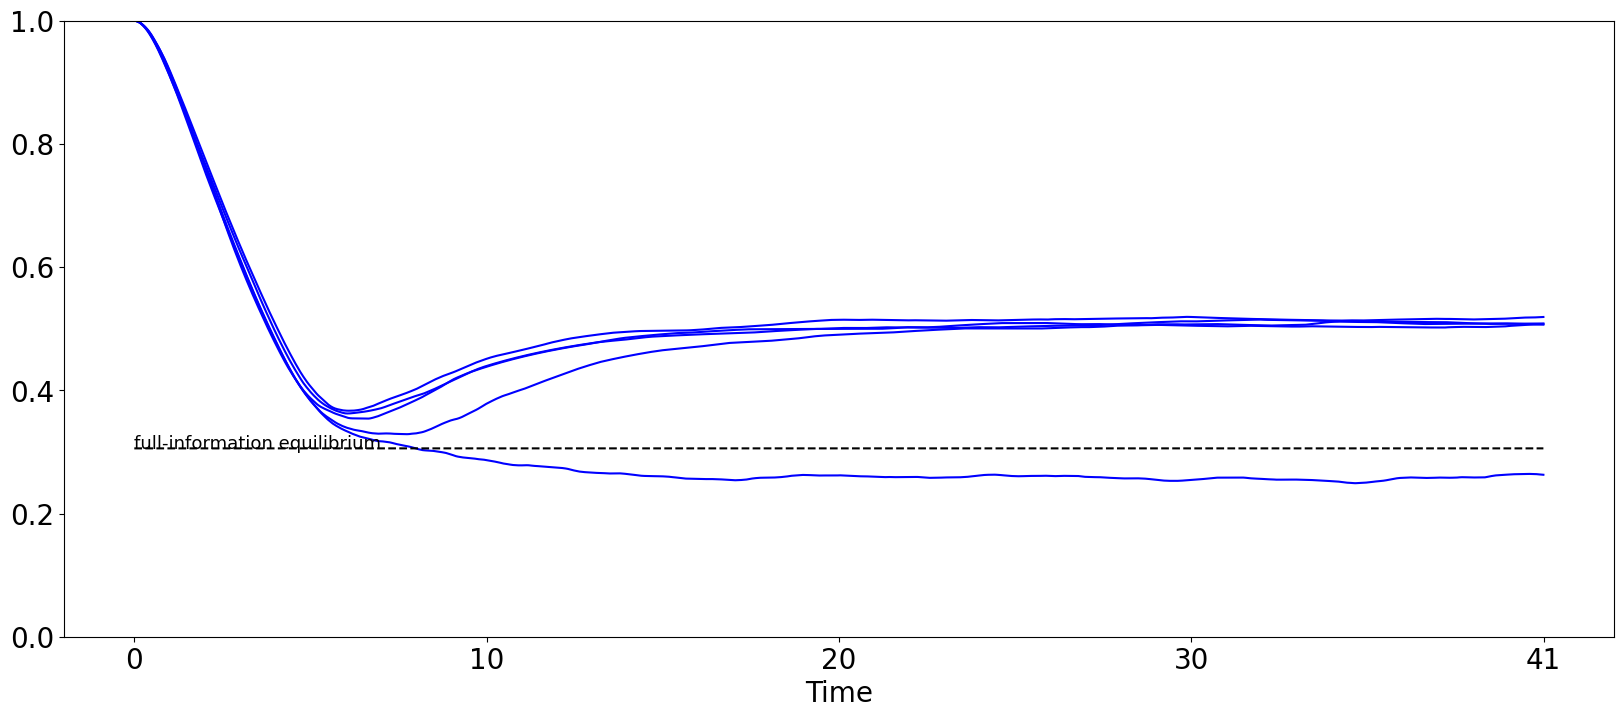

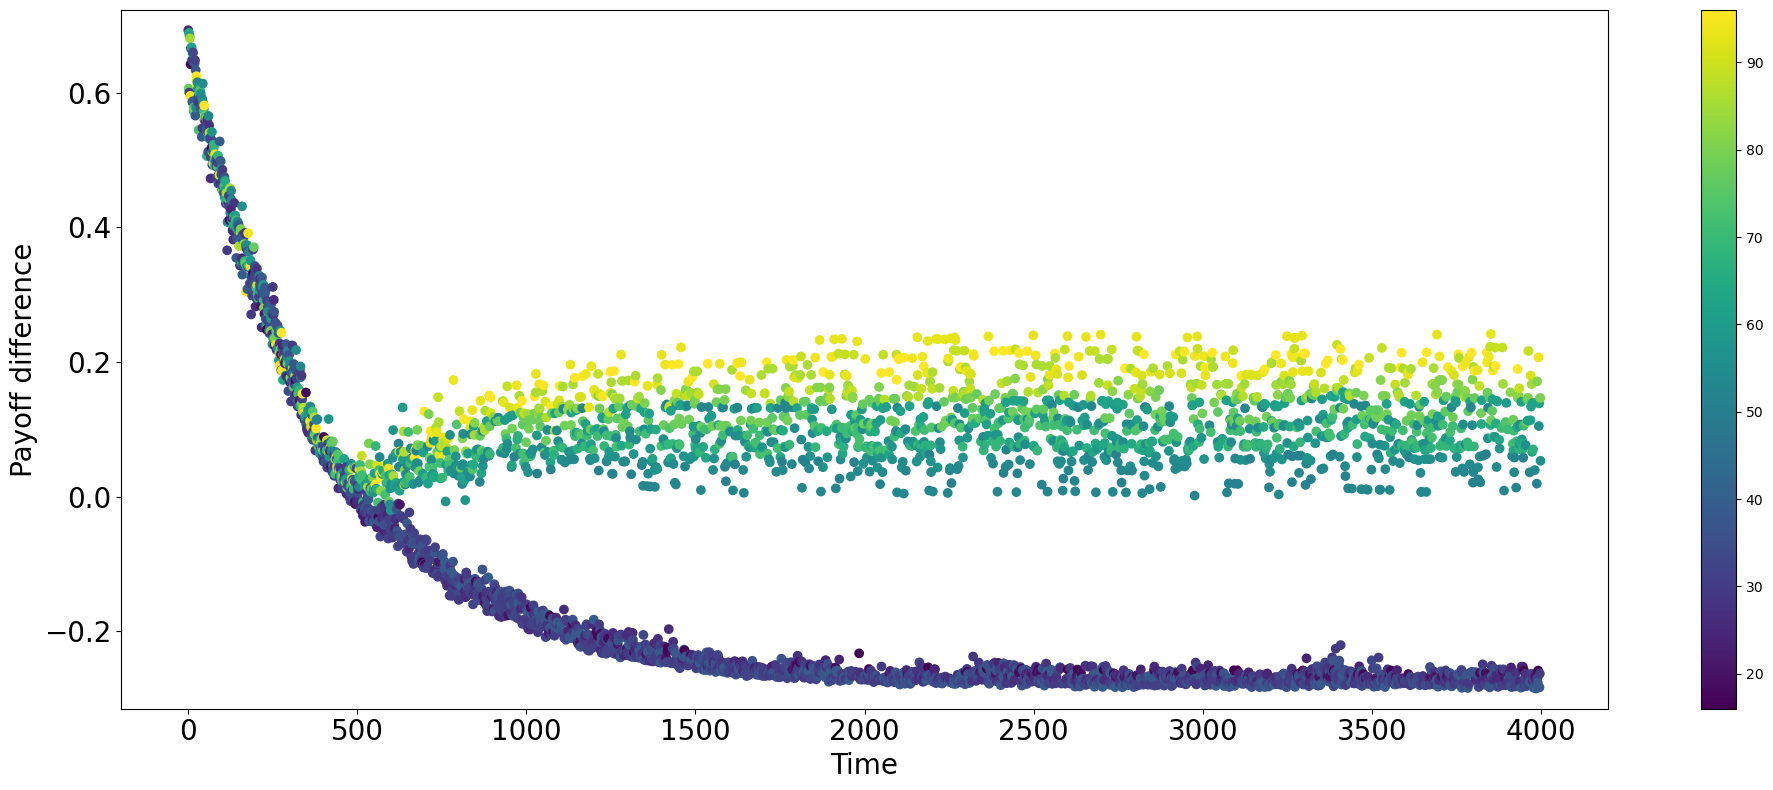

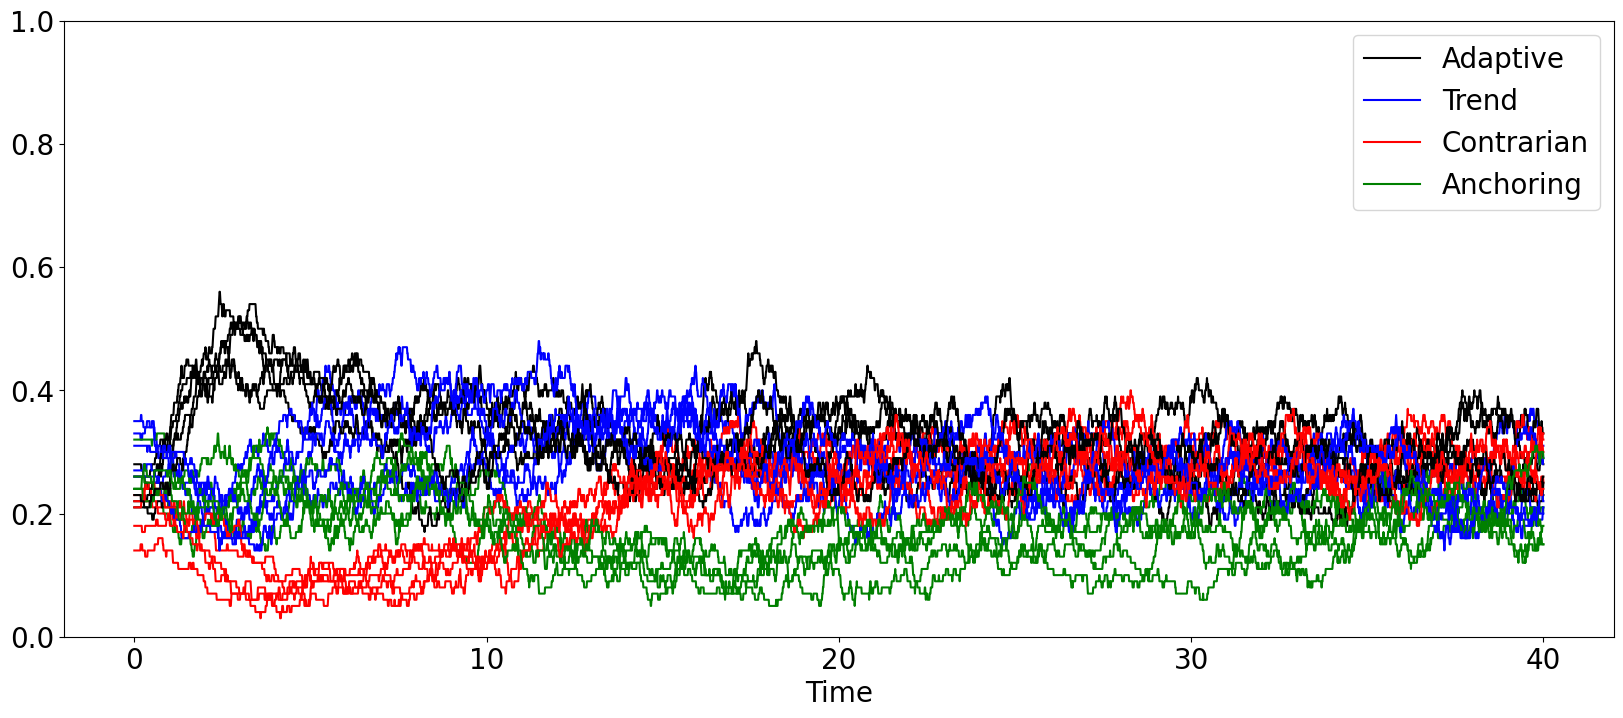

In [5]:
if __name__ == "__main__":
    app = App(x=x, n=n, z=z, P=P, ne=ne, T=T, e1=e1, d0=d0, a1l=a1l, a1h=a1h, a2l=a2l, a2h=a2h, a3l=a3l, a3h=a3h, impact = impact, sigma = sigma,
                b1=b1, b2=b2, b3=b3, h_upd_chance=h_upd_chance, eta=eta, choice_intensity=choice_intensity)
    app.mainloop()